In [1]:
from functools import partial #Funciones de orden superior
from collections import defaultdict #Llama a una función de fábrica para suministrar valores perdidos
import numpy as np
import matplotlib.pyplot as plt # Ploteo
import scipy.integrate #Librería de integración
import sympy 
from mpl_toolkits.mplot3d import axes3d #Used for the 3d bifurcation plot
import matplotlib.patches as mpatches #Leyendas personalizadas
%matplotlib inline

In [18]:
scenarios = [{'S1':0.3375, 'S2':0.788, 'S3':1, 'S4':0.65, 'K1':720, 'K2':720, 'K3':0.007, 'K4':0.007, 'daSYN':15, 'kaSYN':8.5},
            {'S1':0.32, 'S2':0.915, 'S3':1, 'S4':0.7, 'K1':720, 'K2':720, 'K3':0.007, 'K4':0.007, 'daSYN':15, 'kaSYN':8.5}]

# Tiempo de integración para las trayectorias
time = np.linspace(0,2000, 9000)

#Declaramos distintas condiciones iniciales:
#initial_conditions = [(0,0),(3,4),(6,5),(7.8,9),(9,7.8),(13,11),(15,18),(20,20)]
initial_conditions = [(0,0),(0.5,0.5),(1,1.2),(1.3,2.2),(1.7,1.8),(2,1),(2.3,2.3),(2.5, 1.5),(2.7,2.5),(3,1.5),(3.1,2),(3.5,3),(3.8,2.6)]
#initial_conditions = [(0.3,2),(1,2.3),(1.5,2.5),(1.55,4),,(1.7,4.1),(1.8,3.8),(2.1,4),(2.5,4.5),(2.7,3),(3.1,4.1),(3,3.5),(3.5,4.6)]

In [19]:
def Cloutier(y, t, S1, S2, S3, S4, K1, K2, K3, K4, daSYN, kaSYN):
    """ Definimos el modelo de Cloutier
    Argumentos:
        y (array): (concentraciónn de ROS, concentración de aSYNmis)
        t (float): tiempo 
        S1(float): Estrés oxidativo interno y externo
        S2(float): Mecanismo antioxidativo
        S3(float): Daños y mutaciones genéticas
        S4(float): Degradación de proteínas
    Regresa: dy/dt
    """
    ROS, aSYNmis = y
    return np.array([(K1*(1+S1+daSYN*((aSYNmis/kaSYN)**4)/(1+(aSYNmis/kaSYN)**4))-K2*ROS*S2),
                     K3*ROS*S3-K4*aSYNmis*S4])

In [20]:
# Simulamos las trayectorias para ROS y aSYNmis del modelo de Cloutier
trajectory = {}
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        trajectory[i,j] = scipy.integrate.odeint(partial(Cloutier, **param),
                                                 y0=ic,
                                                 t=time)
        

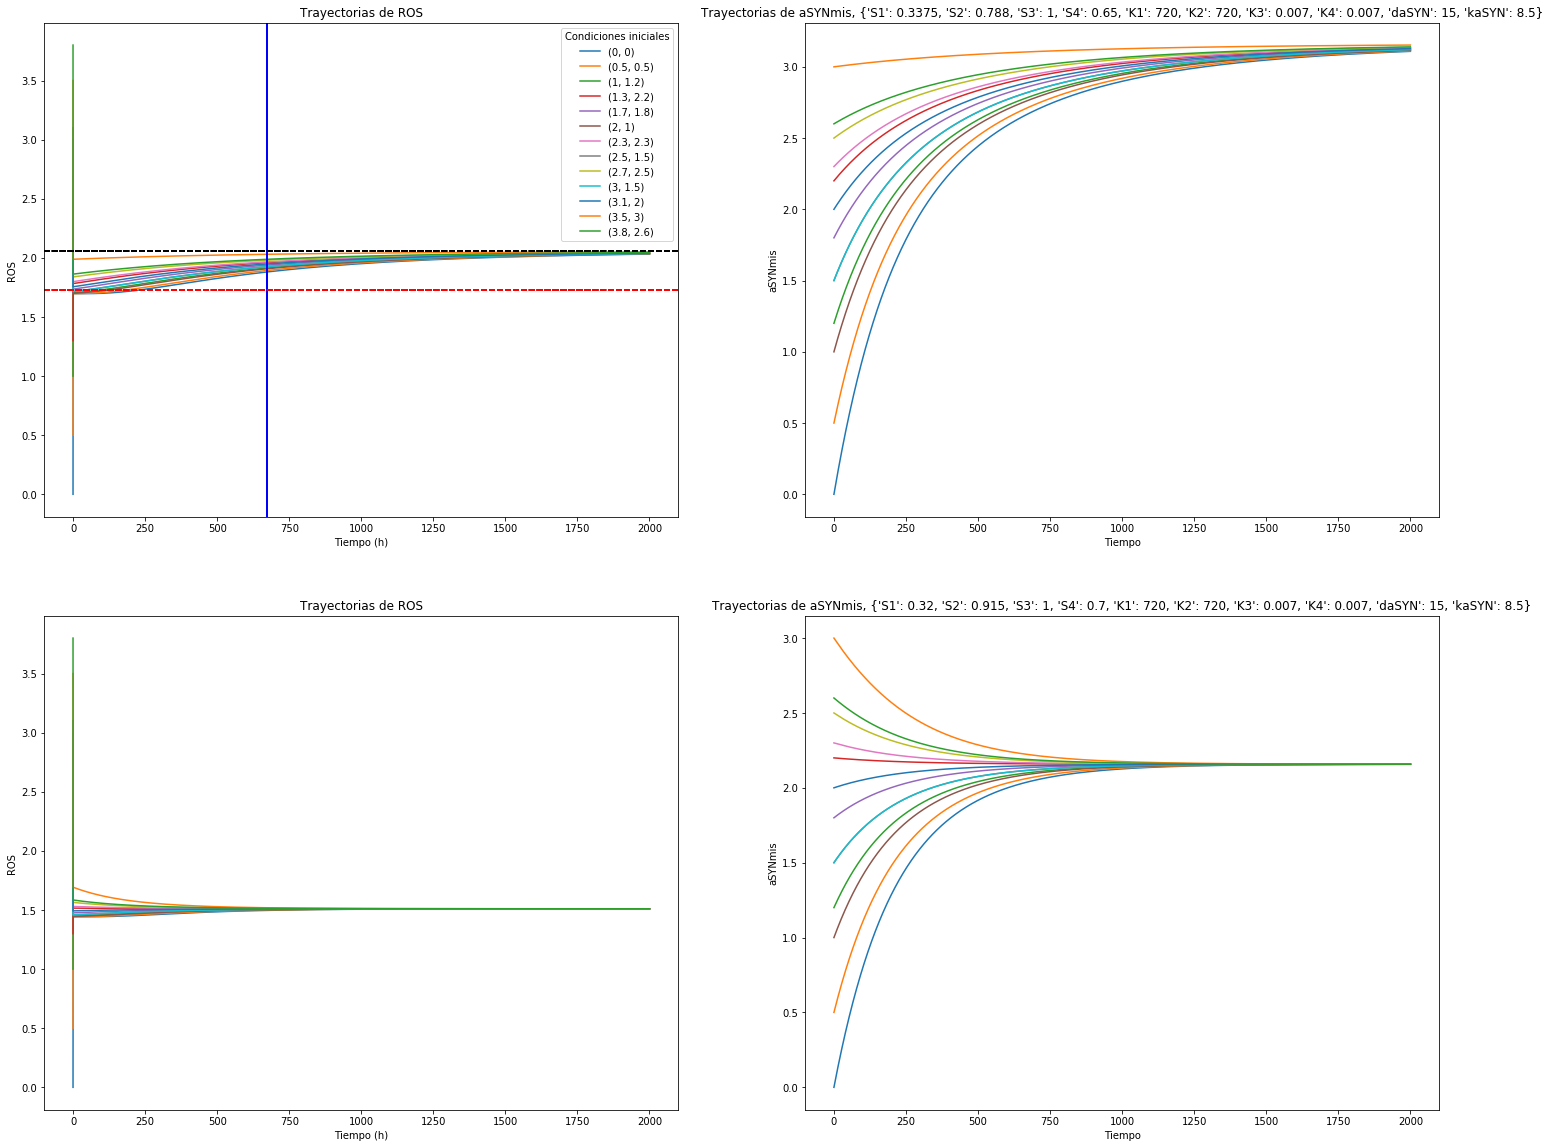

In [22]:
# Dibujamos las trayectorias simuladas de arriba 
fig,ax = plt.subplots(2,2,figsize=(25,20))
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        ax[i][0].set(xlabel='Tiempo (h)', ylabel='ROS', title='Trayectorias de ROS')
        ax[i][1].set(xlabel='Tiempo', ylabel='aSYNmis', title='Trayectorias de aSYNmis, {}'.format(param))
        l = ax[i][0].plot(time,trajectory[i,j][:,0], label=ic)
        ax[i][1].plot(time,trajectory[i,j][:,1], color=l[0].get_color())
        ax[0][0].axvline(x=672, color = "blue")
        ax[0][0].axhline(y=2.054412, color = "black", linestyle = "dashed")
        ax[0][0].axhline(y=1.731017, color = "red", linestyle = "dashed")
        #ax[1][0].axhline(y=1.517080, color = "black", linestyle = "dashed")
        #ax[1][0].axhline(y=1.423125, color = "red", linestyle = "dashed")
ax[0][0].legend(title='Condiciones iniciales')